In [1]:
# 다층 퍼셉트론으로 손글씨 분류하기

In [2]:
# 숫자 필기 데이터 소개

# 사이킷런 패키지에서 제공하는 분류용 예제 데이터
# load_digits() 를 통해 이미지 데이터를 로드할 수 있다

# matplotlib inline
import matplotlib.pyplot as plt # 시각화를 위한 맷플롯릷
from sklearn.datasets import load_digits
digits = load_digits() # 1,979개의 이미지 데이터 로드


In [3]:
# 첫 번째 샘플 출력
# .images[인덱스] 를 사용하면 해당 인덱스의 이미지를 행렬로서 출력 가능

print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [4]:
# 첫 번째 샘플이 8 x 8 행렬로 출력됨
# 실제 레이블도 숫자 0 인지 첫번째 샘플의 레이블을 확인

print(digits.target[0])

0


In [5]:
# 샘플 개수 확인
print(f'전체 샘플의 수 : {len(digits.images)}')

전체 샘플의 수 : 1797


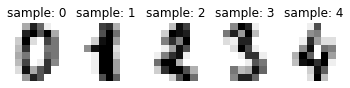

In [6]:
# 전체 샘플 중 상위 5개의 샘플 시각화
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:5]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('sample: %i' % label)

In [7]:
# 상위 5개 샘플 레이블 확인
for i in range(5):
    print(i, '번 인덱스 샘플의 레이블: ', digits.target[i])

0 번 인덱스 샘플의 레이블:  0
1 번 인덱스 샘플의 레이블:  1
2 번 인덱스 샘플의 레이블:  2
3 번 인덱스 샘플의 레이블:  3
4 번 인덱스 샘플의 레이블:  4


In [8]:
# 훈렌 데이터와 레이블을 X, Y 에 저장하기

# digit.images 는 모든 샘플을 8 * 8 행렬로 저장하고 있다.
# 더 나은 방법은 digits.data 를 이용하는 것 -> 8 x 8 행렬을 64차원의 벡터로 변환해서 저장한 상태

# digits.data를 이용하영 첫번째 샘플 출력
print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [9]:
# 64차원의 벡터로 저장된 것을 확인 가능 , 이를 X에 저장하고, 레이블을 Y에 저장
X = digits.data # 이미지 , 즉, 특성 행렬
Y = digits.target # 각 이미지에 대한 레이블 

In [10]:
# 다층 퍼셉트론 분류기 만들기

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim

In [12]:
model = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10)
)

In [13]:
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

loss_fn = nn.CrossEntropyLoss() # 소프트맥수 함수 포함

optimizer = optim.Adam(model.parameters())
losses = []

In [14]:
for epoch in range(100):

    y_pred = model(X)
    loss = loss_fn(y_pred, Y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print('Epoch {:4d}/{} Cost: {:6f}'.format(epoch, 100, loss.item()))
    losses.append(loss.item())

Epoch    0/100 Cost: 2.747156
Epoch   10/100 Cost: 2.112932
Epoch   20/100 Cost: 1.872326
Epoch   30/100 Cost: 1.588476
Epoch   40/100 Cost: 1.301278
Epoch   50/100 Cost: 1.022510
Epoch   60/100 Cost: 0.775500
Epoch   70/100 Cost: 0.581894
Epoch   80/100 Cost: 0.443726
Epoch   90/100 Cost: 0.349236


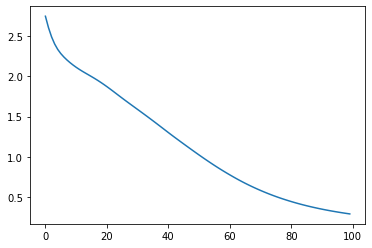

In [15]:
plt.plot(losses)